In [9]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,Y = make_regression(n_samples=90, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

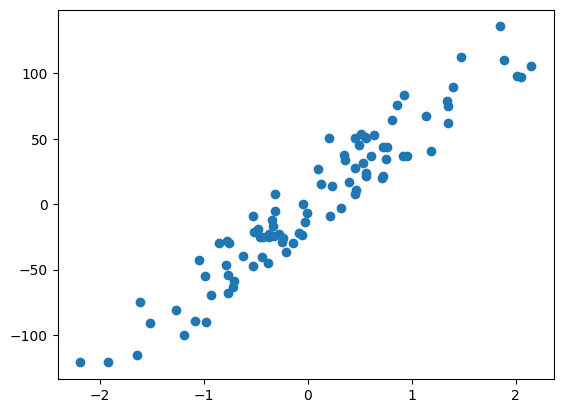

In [3]:
plt.scatter(X,Y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,Y_train)
print(lr.coef_)
print(lr.intercept_)

[61.68915362]
-1.5660746066386677


In [21]:
np.mean(cross_val_score(lr, X, Y, scoring = 'r2',cv = 10))

0.8797702207548947

In [79]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.8990817693300566

In [80]:
m = 61.689

In [12]:
class my_GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 110
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [13]:
gd = my_GDRegressor(0.001,100)
#to go to local minimum just decrease learning rate and increase epochs

In [14]:
gd.fit(X_train,Y_train)

61.68952844428045 -1.5661634279543615


In [23]:
# np.mean(cross_val_score(gd, X, Y, scoring = 'r2',cv = 10))
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.8990796022731893